In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10537,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
import matplotlib.pyplot as plt

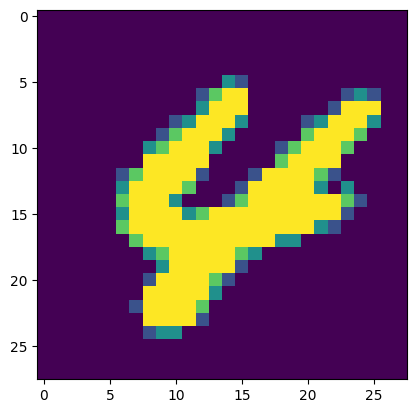

In [6]:
plt.imshow(df.iloc[9707,1:].values.reshape(28,28))

In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
X_train.shape

(33600, 784)

In [10]:
import sklearn



In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

11.972767114639282


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [15]:
#Data to standardise karo
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components = 100)

In [18]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [19]:
X_train_trf.shape

(33600, 100)

In [20]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn.predict(X_test_trf)

In [22]:
accuracy_score(y_test,y_pred)

0.9551190476190476

In [23]:
"""# Sample loop (replace X_train, X_test, y_train, y_test with your data)
prev_accuracy = 0
consecutive_decrease = False  # Flag to track consecutive decreases
count_decrease = 0  # Counter for consecutive decreases

for i in range(1, 300):
    pca = PCA(n_components=i)

    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)

    y_pred = knn.predict(X_test_trf)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{i}  -> Accuracy: {accuracy:.4f}")

    # Check for consecutive decreases
    if accuracy < prev_accuracy:
        count_decrease += 1
    else:
        count_decrease = 0

    # Exit the loop after two consecutive decreases
    if count_decrease >= 3:
        print(f"\nExiting loop at n_components={i} due to two consecutive decreases.")
        break

    # Update previous accuracy
    prev_accuracy = accuracy 
"""

'# Sample loop (replace X_train, X_test, y_train, y_test with your data)\nprev_accuracy = 0\nconsecutive_decrease = False  # Flag to track consecutive decreases\ncount_decrease = 0  # Counter for consecutive decreases\n\nfor i in range(1, 300):\n    pca = PCA(n_components=i)\n\n    X_train_trf = pca.fit_transform(X_train)\n    X_test_trf = pca.transform(X_test)\n\n    knn = KNeighborsClassifier()\n    knn.fit(X_train_trf, y_train)\n\n    y_pred = knn.predict(X_test_trf)\n    \n    accuracy = accuracy_score(y_test, y_pred)\n    print(f"{i}  -> Accuracy: {accuracy:.4f}")\n\n    # Check for consecutive decreases\n    if accuracy < prev_accuracy:\n        count_decrease += 1\n    else:\n        count_decrease = 0\n\n    # Exit the loop after two consecutive decreases\n    if count_decrease >= 3:\n        print(f"\nExiting loop at n_components={i} due to two consecutive decreases.")\n        break\n\n    # Update previous accuracy\n    prev_accuracy = accuracy \n'

In [24]:
#transforming to a 2D coordinate system

pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [25]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                y= X_train_trf[:,1],
                color=y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [26]:
#transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
X_train_trf

array([[-2.71860927, -0.48960967,  1.13539356],
       [-0.6769974 , -6.75297069, -2.33560566],
       [-3.0332335 ,  6.50950389,  7.49179857],
       ...,
       [ 2.14881236,  0.78053606, -0.74761022],
       [ 1.05959519,  0.94795274,  3.94953933],
       [17.70258257,  1.96241143, -4.94337377]])

In [27]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0],
                y= X_train_trf[:,1],
                z= X_train_trf[:,2],
                color=y_train_trf)

fig.update_layout(
    margin=dict(l=20,r=20,t=20,b=20)
)
fig.show()

In [28]:
pca.explained_variance_

array([40.67111198, 29.17023388, 26.74459618])

In [29]:
pca.components_

array([[-1.32794546e-16,  1.25139931e-18, -1.51473651e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-4.70764768e-17,  2.02723379e-18, -8.44112699e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.05294869e-17, -5.48637090e-17,  4.25166735e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [30]:
pca.components_.shape
#eigen vectors

(3, 784)

In [31]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [32]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
X_train_trf

array([[-2.71863253e+00, -4.89824095e-01,  1.13549660e+00, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [-6.76980150e-01, -6.75362491e+00, -2.33590139e+00, ...,
        -6.92445646e-15,  2.57419327e-15,  2.80054364e-15],
       [-3.03323281e+00,  6.50981624e+00,  7.49182983e+00, ...,
         5.53274929e-16, -3.44832319e-15, -2.70664486e-15],
       ...,
       [ 2.14883643e+00,  7.80794439e-01, -7.47387739e-01, ...,
        -3.84119696e-18, -4.26641808e-18, -5.31513994e-18],
       [ 1.05957006e+00,  9.47673116e-01,  3.94973114e+00, ...,
        -2.67799564e-17, -9.43936005e-18,  1.70057390e-17],
       [ 1.77025845e+01,  1.96188185e+00, -4.94352837e+00, ...,
        -1.10463772e-17, -1.02409472e-17, -5.97498488e-18]])

In [33]:
pca.components_.shape

(784, 784)

In [34]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [35]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

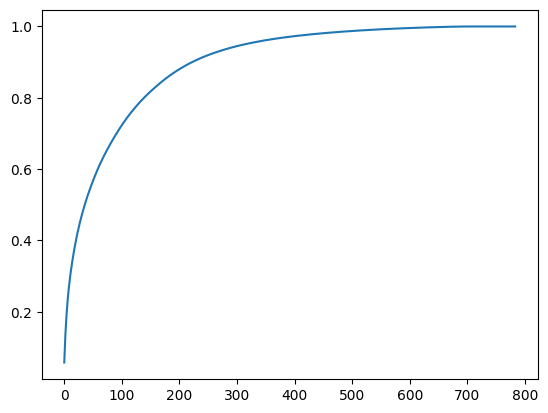

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))